<a target="_blank" href="https://colab.research.google.com/github/umanitoba-meagher-projects/public-experiments/blob/main/jupyter-notebooks/Visualize%20Image%20Information/sightings-bar-graph.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
"""
Author: Ryleigh J. Bruce
Date: June 11, 2024

Purpose: To create several bar graphs depicting the volume of animal sightings per location across, months, seasons, and species.


Note: The author generated this text in part with GPT-4,
OpenAI’s large-scale language-generation model. Upon generating
draft code, the authors reviewed, edited, and revised the code
to their own liking and takes ultimate responsibility for
the content of this code.

"""

# Introduction

This notebook provides a systematic approach to visualizing animal sighting data across various locations, months, seasons, and species. The primary objective is to transform raw observational data into interpretable bar graphs that reveal patterns in animal presence and distribution. The workflow begins by mounting Google Drive to access the dataset, followed by importing essential Python libraries such as pandas and matplotlib for data manipulation and visualization. The dataset, which is structured as an Excel file, is loaded into a DataFrame, and preliminary data checks are performed to ensure integrity. The methodology involves extracting temporal features (such as month and season) from date fields, aggregating sighting counts by relevant categories (location, month, season, species), and generating grouped bar plots to illustrate these aggregations. Each section of the notebook is modular, focusing on a specific aspect of the data—monthly, seasonal, and species-based analyses—using consistent data processing and plotting techniques. The notebook emphasizes reproducibility and clarity, with markdown explanations accompanying each code block to guide users through the logic and purpose of each step. The benefits of this approach include the ability to quickly identify spatial and temporal trends in animal sightings, support for further ecological or spatial analysis, and adaptability for use with different datasets or research questions. The notebook is structured to be accessible for users with varying levels of experience in Python and data analysis, serving both as a practical tool for data exploration and as an educational resource for understanding the application of Python in ecological data visualization.

# Critical Uses & Adaptability

## What the Notebooks Can Be Used For:

- **Dataset Exploration:**
  - Enables users to examine the distribution and frequency of animal sightings across different spatial and temporal dimensions. The notebook's aggregation and plotting steps (see code blocks for grouping and plotting) facilitate the identification of trends and anomalies in the dataset.

- **Educational Purposes & Demonstrations:**
  - Serves as a resource for demonstrating the use of Python code, scripting, and basic data analysis techniques in the context of ecological or image-based datasets. The notebook includes step-by-step explanations and code for data loading, transformation, and visualization, making it suitable for instructional settings or self-guided learning. It also introduces foundational concepts relevant to machine learning workflows, such as feature extraction and data aggregation.

- **Feature Extraction:**
  - Illustrates how to derive new variables (e.g., month, season, total sightings) from raw data fields. These derived features are used for further analysis and visualization, as shown in the code blocks that create new DataFrame columns and perform groupby operations.

## How the Notebook Can Be Adapted:

- **Integration with Spatial Design & Architectural Studies:**
  - The notebook's approach to aggregating and visualizing spatial data can be applied to site analysis tasks in spatial design or architecture. By swapping the animal sighting dataset with spatial or architectural datasets, users can analyze patterns such as foot traffic, environmental features, or usage intensity across locations and time periods.

- **Variables & Customization:**
  - Variables such as 'locationID', 'Date', 'SpeciesList', and count columns are explicitly defined and can be modified to match the schema of alternative datasets. Users can adjust aggregation keys or add new features as needed for their specific analysis goals.

- **Swapping Datasets:**
  - The notebook is designed to accommodate different datasets by changing the file path and ensuring the new dataset contains compatible columns. The code block responsible for loading the dataset (see the cell beginning with `file_path = ...` and `df = pd.read_excel(file_path)`) can be edited to point to a custom dataset, provided the necessary columns are present or appropriately renamed.

- **Scalability:**
  - The modular structure of the notebook allows for the addition of new analysis sections or the scaling up of existing ones to handle larger datasets or more complex grouping variables. The use of pandas and matplotlib ensures compatibility with large data volumes and supports further extension with additional Python libraries if required.

## Module: Mount the Notebook to Google Drive

Here the drive module is imported, allowing the Colab environment to access files within Google Drive. The notebook is then mounted to Google Drive so that it can interact with the files.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Volume of Sightings Across Locations Per Month

## Module: Importing the Necessary Libraries and Loading them into a DataFrame

Here the `pandas` and `matplotlib.pyplot` libraries are being imported in order to use their data manipulation and visualization properties later on in the script. `pandas` will be particularly useful for transforming the data found within the given spreadsheet into an easier to manipulate DataFrame format, and `matplotlib.pyplot` is crucial for generating the graph.

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

The `file_path` variable is defined as the path to the Excel file containing the necessary information for graph generation. The `df` function from the `pandas` library transforms the information from the file into DataFrame format for further manipulation.

In [ ]:
# Read the Excel file
file_path = '/content/drive/MyDrive/shared-data/Notebook datafiles/combined_animals.xlsx'  # Change this to the correct file path if necessary
df = pd.read_excel(file_path)

The `print(df.head())` code returns the first five rows of the DataFrame in order to view the contained data and ensure the file has been properly transformed into a DataFrame.

In [ ]:
# Check the first few rows of the DataFrame to ensure it's loaded correctly
print(df.head())

       File                              newFile RelativePath  \
0  RCNX0571  2020-05-16-RECNX1_RCNX0571-Bird.JPG          NaN   
1  RCNX0572  2020-05-16-RECNX1_RCNX0572-Bird.JPG          NaN   
2  RCNX0573  2020-05-16-RECNX1_RCNX0573-Bird.JPG          NaN   
3  RCNX0581  2020-05-16-RECNX1_RCNX0581-Bird.JPG          NaN   
4  RCNX0582  2020-05-16-RECNX1_RCNX0582-Bird.JPG          NaN   

              Folder       Date  locationID cameraNum      Time ImageQuality  \
0  2020-05-16-RECNX1 2020-05-16           1         1  18:02:30           Ok   
1  2020-05-16-RECNX1 2020-05-16           1         1  18:02:31           Ok   
2  2020-05-16-RECNX1 2020-05-16           1         1  18:02:31           Ok   
3  2020-05-16-RECNX1 2020-05-17           1         1  07:05:46           Ok   
4  2020-05-16-RECNX1 2020-05-17           1         1  07:05:47           Ok   

   DeleteFlag  ...  Sensitivity BatteryLevel  Unnamed: 25  Unnamed: 23  \
0       False  ...          NaN          NaN          

Here the `pd.to_datetime(df[‘Date’])` function extracts the information from the ‘Date’ column within the DataFrame and turns that data into datetime format. This conversion is critical for performing accurate time-based calculations.

In [ ]:
# Ensure the Date column is treated as a datetime object
df['Date'] = pd.to_datetime(df['Date'])

## Module: Manipulating the Dataframe

The `.strftime(‘%B’)` method is used to specify the format of the datetime information from the 'Date' column. The `%B` code returns the full name of the month.

`df[‘Month’]` creates a new column within the DataFrame called ‘Month’, which stores the formatted information extracted from the ‘Date’ column.

In [ ]:
# Extract the month from the Date column
df['Month'] = df['Date'].dt.strftime('%B')

Using `df` to refer to the data stored within the DataFrame, this code accesses the information in the AdultCount and JuvenileCount columns, and uses `df[‘AdultCount’] + [‘JuvenileCount’]` to calculate the value of `df[‘TotalSightings’]`. This information is stored within the DataFrame as a new column called ‘TotalSightings’.

In [ ]:
# Calculate the total number of animals spotted (AdultCount + JuvenileCount)
df['TotalSightings'] = df['AdultCount'] + df['JuvenileCount']

Here the DataFrame is grouped by the ‘locationID’ and ‘Month’ columns, ensuring that separate sums will be calculated for each unique combination of location ID and month. The `sum` operation is then used to calculate the sum of each ‘TotalSightings’ column per unique grouping. A new DataFrame called `aggregated_data` is then created to store the new data.

In [ ]:
# Aggregate the data to sum the total sightings per month and location
aggregated_data = df.groupby(['locationID', 'Month']).agg({'TotalSightings': 'sum'}).reset_index()

## Module: Plotting the Bar Graph

This code begins by creating an empty figure and set of subplots, `fig, ax`, while `figsize=(14, 8)` sets the dimensions of the figure in inches.




Then the code retrieves all of the unique month values from the DataFrame. The `for month in aggregated_data[‘Month’].unique():` iterates over each unique month, while `subset = aggregated_data[aggregated_data[‘Month’] == month]` filters the information so that only rows matching the current month of the loop is included in the creation of that month’s subset.

`ax.bar()` creates a bar plot for the given subset, and the x-axis values and height of the bars are set as ‘locationID’ and ‘TotalSightings’ respectively.

Next labels are assigned to the x and y axes, and a title is provided for the entire graph. `ax.legend(title=’Month’)` generates a title for the legend.

Finally, the graph is visualized using `plt.show()`.

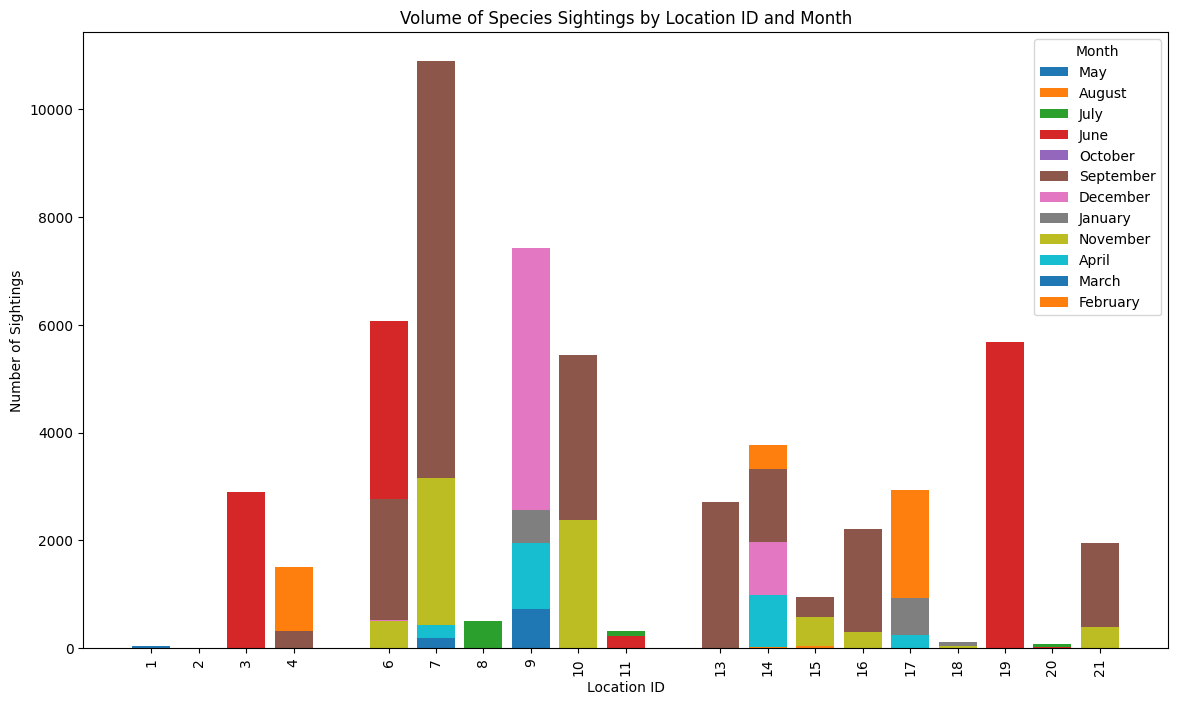

In [ ]:
# Generate a bar plot
fig, ax = plt.subplots(figsize=(14, 8))

# Create a bar plot for each month and location ID
for month in aggregated_data['Month'].unique():
    subset = aggregated_data[aggregated_data['Month'] == month]
    ax.bar(subset['locationID'], subset['TotalSightings'], label=month)

# Set the labels and title
ax.set_xlabel('Location ID')
ax.set_ylabel('Number of Sightings')
ax.set_title('Volume of Species Sightings by Location ID and Month')
ax.legend(title='Month')

ax.set_xticks(aggregated_data['locationID'].unique())
ax.set_xticklabels(aggregated_data['locationID'].unique(), rotation=90)

plt.xticks(rotation=90)

# Display the plot
plt.show()

# Volume of Sightings Across Locations Per Season

In order to create a bar graph depicting the volume of sightings across locations by season, the first few blocks of code will remain the same as in the previous script.

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file
file_path = '/content/drive/MyDrive/shared-data/Notebook datafiles/combined_animals.xlsx'
df = pd.read_excel(file_path)

# Ensure the Date column is treated as a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month from the Date column
df['Month'] = df['Date'].dt.month

## Module: Manipulating the Dataframe

A dictionary is created and assigned to the `month_to_season` variable. The dictionary stores the months of the year in integer format and their corresponding seasons.

In [ ]:
# Map the months to seasons
month_to_season = {3: 'Spring', 4: 'Spring', 5: 'Spring',
                   6: 'Summer', 7: 'Summer', 8: 'Summer',
                   9: 'Autumn', 10: 'Autumn', 11: 'Autumn',
                   12: 'Winter', 1: 'Winter', 2: 'Winter'}

A new column is created in the DataFrame called ‘Season’ and the script populates the column with the corresponding value for each month in the ‘Month’ column of the DataFrame.

In [ ]:
df['Season'] = df['Month'].map(month_to_season)

The calculation of the ‘TotalSightings’ variable, creation of the `aggregated_data` DataFrame, and figure generation are all the same as the previous bar graph script.

In [ ]:
# Calculate the total number of animals spotted (AdultCount + JuvenileCount)
df['TotalSightings'] = df['AdultCount'] + df['JuvenileCount']

# Aggregate the data to sum the total sightings per month and location
aggregated_data = df.groupby(['locationID', 'Season']).agg({'TotalSightings': 'sum'}).reset_index()

# Generate a bar plot
fig, ax = plt.subplots(figsize=(14, 8))

## Module: Plotting the Graph

Here the `plt.get_cmap()` function is used to import the ‘tab20c’ color map. Colors from the imported color map are then assigned to each season.

In [ ]:
# Get the colormap
color_map = plt.get_cmap('tab20c')

# Map each season to a color from the colormap
season_to_color = {'Spring': color_map(0), 'Summer': color_map(4), 'Autumn': color_map(8), 'Winter': color_map(12)}

The season information within the `aggregated_data` DataFrame is iterated over and filtered, just as the month data was in the previous script. The x-axis values, bar heights, and labels are also determined in the same way.

In [ ]:
# Create a bar plot for each season and location ID
for season in aggregated_data['Season'].unique():
    subset = aggregated_data[aggregated_data['Season'] == season]
    ax.bar(subset['locationID'], subset['TotalSightings'], label=season, color=season_to_color[season])

This code block simply formats the x-ticks and x-tick labels appropriately for the graph. `rotation=90` rotates the x-tick labels by 90 degrees to maintain legibility.


In [ ]:
ax.set_xticks(aggregated_data['locationID'].unique())
ax.set_xticklabels(aggregated_data['locationID'].unique(), rotation=90)

Here the labels for each axis are set, as well as the title for the overall graph. `plt.xticks(rotation=90)` ensures that all of the x-tick labels will be displayed, and the plot is visualized using `plt.show()`.

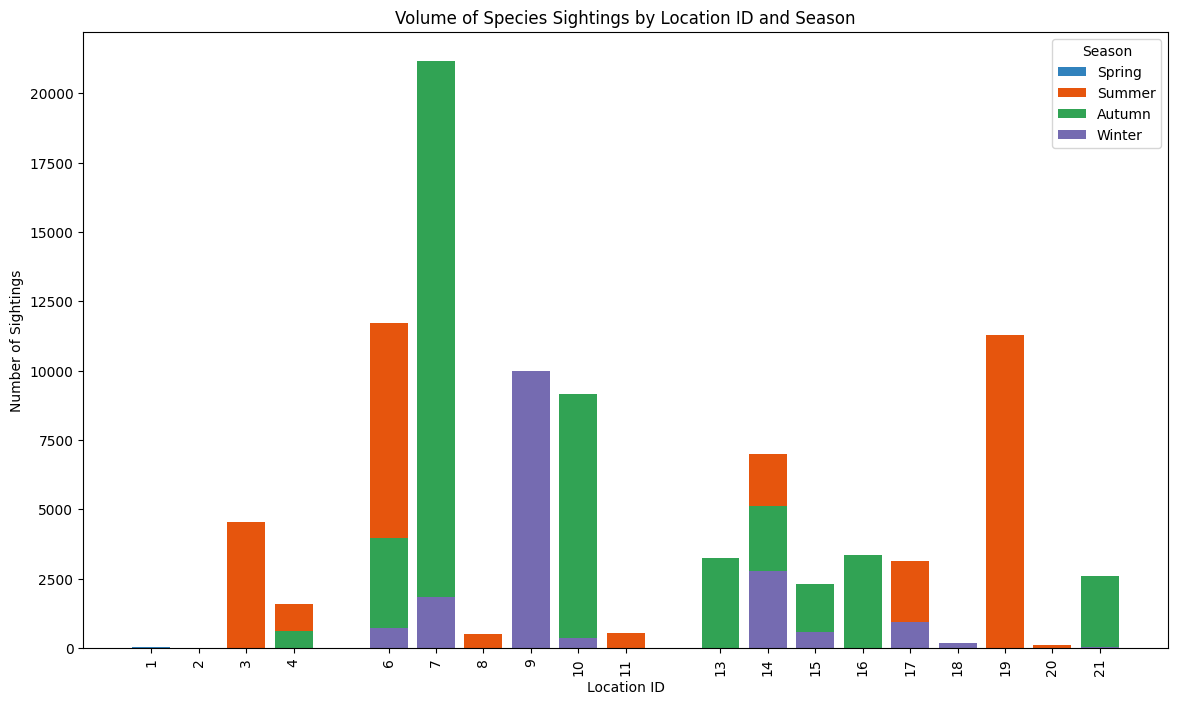

In [ ]:
# Set the labels and title
ax.set_xlabel('Location ID')
ax.set_ylabel('Number of Sightings')
ax.set_title('Volume of Species Sightings by Location ID and Season')
ax.legend(title='Season')

# Make sure all X labels are displayed
plt.xticks(rotation=90)

# Display the plot
plt.show()

# Volume of Sightings Across Locations Per Species

In order to plot a bar graph to depict the volume of sightings per species across locations, the same libraries must be imported with the addition of the `numpy` library. The `numby` library is crucial for working with arrays and large data.

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Just like the previous two scripts, the Excel sheet must be converted into a two-dimensional DataFrame before any data manipulation can take place.


In [ ]:
# Read the Excel file
file_path = '/content/drive/MyDrive/shared-data/Notebook datafiles/combined_animals.xlsx'  # Change this to the correct file path if necessary
df = pd.read_excel(file_path)

## Module: Manipulating the Dataframe

The species information does not need to be converted into any other formats before the graph is generated, so the manipulation of the DataFrame will be much simpler for this script.

The ‘TotalSightings’ column will be added to the DataFrame after the values from the ‘AdultCount’ and ‘JuvenileCount’ columns have been added together. Then the rows will be grouped by locationID and SpeciesList, creating a new DataFrame called `aggregated_data`. An empty figure is created to hold the plot and the `num_categories` function determines the length of the ‘SpeciesList’ column in the DataFrame in order to count the number of animal categories that exist.

In [ ]:
# Ensure the Date column is treated as a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the total number of animals spotted (AdultCount + JuvenileCount)
df['TotalSightings'] = df['AdultCount'] + df['JuvenileCount']

# Aggregate the data to sum the total sightings per species and location
aggregated_data = df.groupby(['locationID', 'SpeciesList']).agg({'TotalSightings': 'sum'}).reset_index()

# Set up the figure and axis for plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Determine the number of unique species
num_categories = len(aggregated_data['SpeciesList'].unique())

## Module: Plotting the Graph

The tab20c colormap is imported using the `plt.get_cmpa()` function, and `np.linespace(0, 1, num_categories)` creates an equally spaced list of `num_categories` between 0 and 1 in order to evenly spread the colors selected for each species. A dictionary called `species_to_color` is then created to map a color to each species. The final code block ensures that there is a bar plot for each individual species.

In [ ]:
# Create color map using the specified line
colors = plt.get_cmap('tab20c')(np.linspace(0, 1, num_categories))

# Generate a mapping of SpeciesList to colors
species_to_color = {species: colors[i] for i, species in enumerate(sorted(aggregated_data['SpeciesList'].unique()))}

# Iterate over each species to plot
for species, group in aggregated_data.groupby('SpeciesList'):
    ax.bar(group['locationID'], group['TotalSightings'], label=species, color=species_to_color[species])

The graph is plotted in the same way as the previous two scripts, with a small difference to ensure the legend does not clip the graph. `plt.tight_layout(rect=[0, 0, 0.85, 1])` ensures that there is enough space left for the legend.

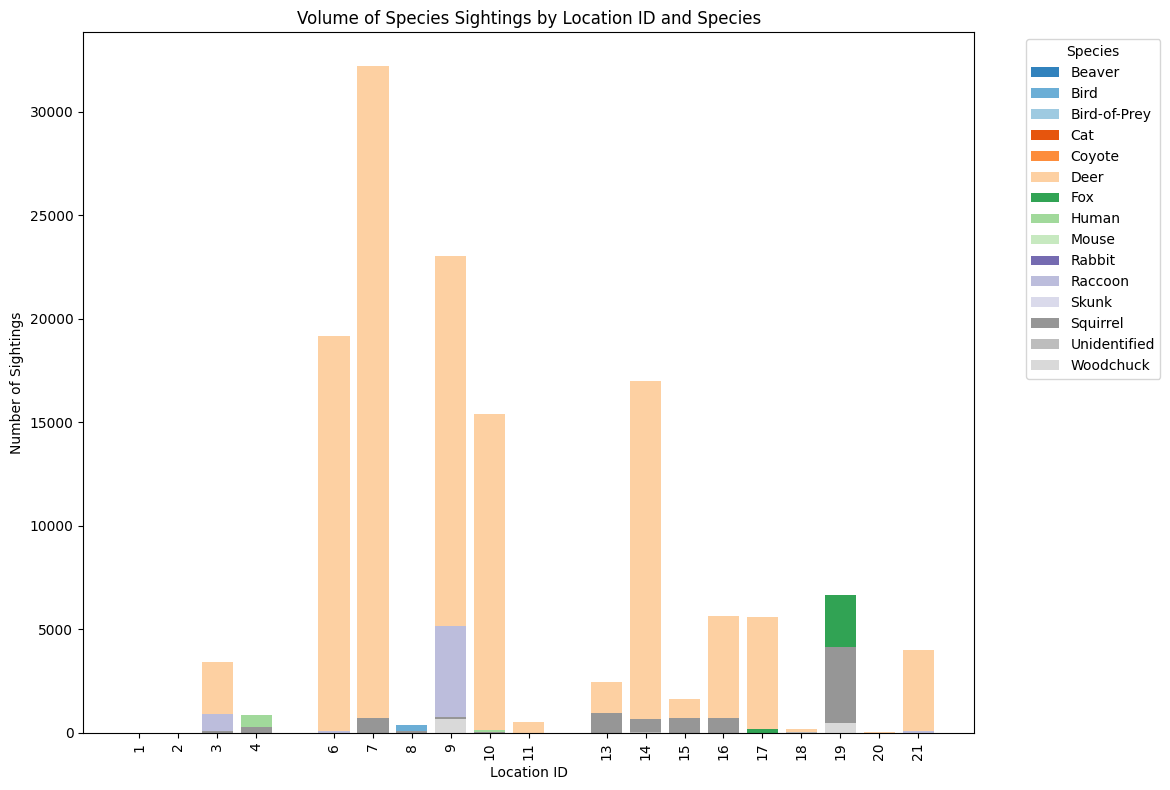

In [ ]:
# Set the labels and title
ax.set_xlabel('Location ID')
ax.set_ylabel('Number of Sightings')
ax.set_title('Volume of Species Sightings by Location ID and Species')
ax.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ensure x-axis shows every location ID
ax.set_xticks(aggregated_data['locationID'].unique())
ax.set_xticklabels(aggregated_data['locationID'].unique(), rotation=90)

# Improve layout and avoid clipping of the legend or x-labels
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjusts the plot limits to leave space for the legend

# Display the plot
plt.show()